# Predicting Survival from Titanic Disaster using Logistic Regression and Data Visualization

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

This analysis provides what sorts of people were likely to survive.

## Summary

This project uses machine learning to predict if a given passenger survived from the Titanic disaster in following steps:-
1) Importing the Data and Initial Data Analysis
2) Data Visualization for Understanding the Data
3) Data Processing Stage
4) Predictive Modelling Stage
5) Data Visualization for Validation of the Predicted Test Data

## Importing the Data and Initial Data Analysis

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing training
df_train=pd.read_csv('train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Importing test data
df_test=pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
# Summary of train data
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


## Data Visualization for understanding the Data

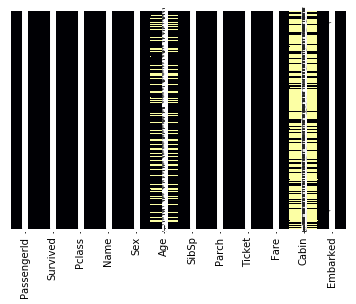

In [7]:
# NULL Heatmap for Train data
sns.heatmap(df_train.isnull(),yticklabels=False, cbar=False,cmap='inferno',annot=True)

The heatmap shows that Age and Cabin has NULL values in it. However, we can impute the Age as the number of NULL values are less.

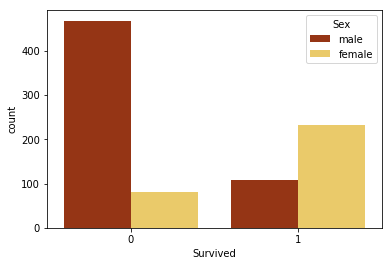

In [8]:
sns.countplot(x='Survived',hue='Sex',data=df_train,palette='afmhot')

The above Countplot shows that more females have survived than males.

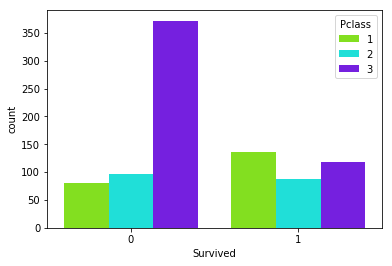

In [9]:
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='hsv')

The above Countplot shows that Class 3 Passengers have least Survival Rate

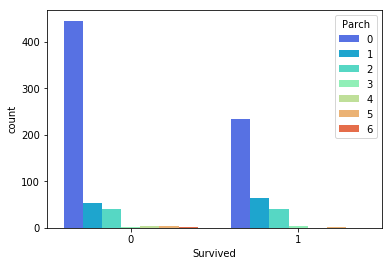

In [10]:
sns.countplot(x='Survived',hue='Parch',data=df_train,palette='rainbow')

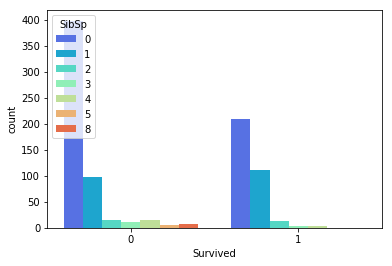

In [11]:
sns.countplot(x='Survived',hue='SibSp',data=df_train,palette='rainbow')

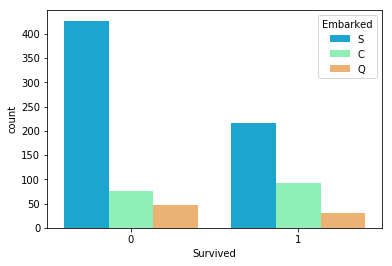

In [12]:
sns.countplot(x='Survived',hue='Embarked',data=df_train,palette='rainbow')

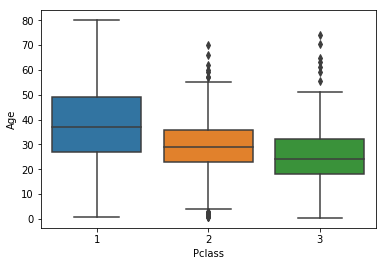

In [13]:
sns.boxplot(x='Pclass',y='Age',data=df_train)

In [14]:
# Calculating Mean Age for each Passenger Class
df_train.groupby('Pclass', as_index=False)['Age'].mean()

,Pclass,Age
0,1,38.233441
1,2,29.877630
2,3,25.140620


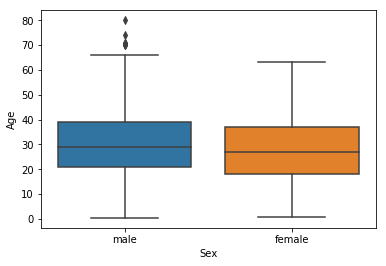

In [15]:
sns.boxplot(x='Sex',y='Age',data=df_train)

In [16]:
# Calculating mean age across sex distribution
df_train.groupby('Sex', as_index=False)['Age'].mean()

,Sex,Age
0,female,27.915709
1,male,30.726645


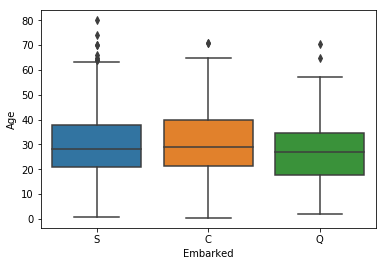

In [17]:
sns.boxplot(x='Embarked',y='Age',data=df_train)

In [18]:
# Since it is evident from the above plots and analysis that Age has well-defined relation with respect to both Sex and Passenger Class.
# Computing mean Age across Sex and Passenger Class - This will be used for imputing the Age. 
df_train.groupby(['Sex','Pclass'])['Age'].mean()

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

## Data Processing Stage

In [19]:
# Age Imputation
def ImputeAge(column):
    Age = column[0]
    Sex = column[1]
    Pclass=column[2]

    if pd.isnull(Age):
        if Sex == 'male' and Pclass==1:
            return 41
        elif Sex == 'male' and Pclass==2:
            return 31
        elif Sex == 'male' and Pclass==3:
            return 26
        elif Sex == 'female' and Pclass==1:
            return 35
        elif Sex == 'female' and Pclass==2:
            return 29
        else:
            return 22
    else:
        return Age
    
df_train['Age'] = df_train[['Age','Sex','Pclass']].apply(ImputeAge,axis=1)
df_test['Age'] = df_test[['Age','Sex','Pclass']].apply(ImputeAge,axis=1)

In [ ]:
def ImputeAge(column):
    Age = column[0]
    Sex = column[1]
    Pclass=column[2]

    if pd.isnull(Age):
        if Sex == 'male' and Pclass==1:
            return 41
        elif Sex == 'male' and Pclass==2:
            return 31
        elif Sex == 'male' and Pclass==3:
            return 26
        elif Sex == 'female' and Pclass==1:
            return 35
        elif Sex == 'female' and Pclass==2:
            return 29
        else:
            return 22
    else:
        return Age
    
df_train['Age'] = df_train[['Age','Sex','Pclass']].apply(ImputeAge,axis=1)
df_test['Age'] = df_test[['Age','Sex','Pclass']].apply(ImputeAge,axis=1)

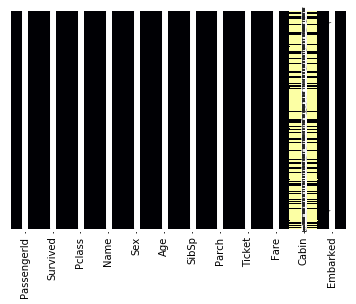

In [20]:
# NULL Heatmap to visualize that Age is correctly imputed.
sns.heatmap(df_train.isnull(),yticklabels=False, cbar=False,cmap='inferno',annot=True)

In [21]:
# Dropping Cabin from both Test and Train data as we do not have enough data across Cabin to predict Survival
df_train.drop('Cabin', axis=1, inplace=True)
df_test.drop('Cabin', axis=1, inplace=True)

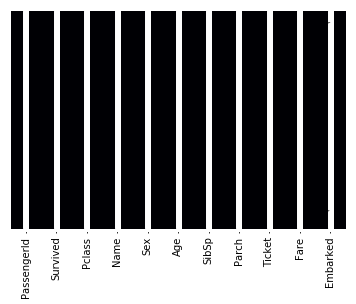

In [22]:
# Heatmap of the processed train data
sns.heatmap(df_train.isnull(),yticklabels=False, cbar=False,cmap='inferno',annot=True)

In [23]:
# Logic to replace the NULL Fare in df_test
df_test['Fare'].fillna(df_test['Fare'].mean(), inplace=True) 

In [24]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(4)
memory usage: 32.7+ KB


In [25]:
# Converting categorical variables into indicator variables
sex = pd.get_dummies(df_train['Sex'],drop_first=True)
embark = pd.get_dummies(df_train['Embarked'],drop_first=True)

In [26]:
# Name and Ticket have no role in the model prediction
# Replacing Sex and Embarked columns with the new indicator variables
df_train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df_train = pd.concat([df_train,sex,embark],axis=1)

In [27]:
# Repeating the above process for test
sex = pd.get_dummies(df_test['Sex'],drop_first=True)
embark = pd.get_dummies(df_test['Embarked'],drop_first=True)

In [28]:
df_test.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)
df_test = pd.concat([df_test,sex,embark],axis=1)

In [29]:
df_train.drop(['PassengerId'],axis=1,inplace=True)
Passenger_ID = df_test['PassengerId'] # Saving for later
df_test.drop(['PassengerId'],axis=1,inplace=True)

In [30]:
# Fully processed train data
df_train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [31]:
# Fully processed test data
df_test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [32]:
# PassengerId
Passenger_ID

0       892
1       893
2       894
3       895
4       896
5       897
6       898
7       899
8       900
9       901
10      902
11      903
12      904
13      905
14      906
15      907
16      908
17      909
18      910
19      911
20      912
21      913
22      914
23      915
24      916
25      917
26      918
27      919
28      920
29      921
       ... 
388    1280
389    1281
390    1282
391    1283
392    1284
393    1285
394    1286
395    1287
396    1288
397    1289
398    1290
399    1291
400    1292
401    1293
402    1294
403    1295
404    1296
405    1297
406    1298
407    1299
408    1300
409    1301
410    1302
411    1303
412    1304
413    1305
414    1306
415    1307
416    1308
417    1309
Name: PassengerId, Length: 418, dtype: int64

## Predictive Modelling Stage

In [33]:
# Using Train-Test Split to randomize the data for Predictive modelling
from sklearn.model_selection import train_test_split

x = df_train.drop('Survived', axis = 1)
y = df_train['Survived']

x_train, x_test, y_train, y_test = train_test_split(df_train.drop('Survived',axis=1),df_train['Survived'], test_size = 0.25,random_state=100)

In [34]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train,y_train)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
acc_log

81.29

In [36]:
# Decision Tree Classifier
from sklearn import tree

treeclf = tree.DecisionTreeRegressor()
treeclf.fit(x_train,y_train)
acc_tree = round(treeclf.score(x_train, y_train) * 100, 2)
acc_tree

96.94

In [37]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

ranclf =RandomForestClassifier(n_estimators=20, max_depth=None,min_samples_split=2, random_state=0)
ranclf.fit(x_train,y_train)
acc_ranclf = round(ranclf.score(x_train, y_train) * 100, 2)
acc_ranclf

98.05

In [39]:
# Predicting Survival values for Test data.
survived=ranclf.predict(df_test)

In [40]:
# Feeding PassengerId and Survived into Test data
df_test['Survived']=survived
df_test['PassengerID']=Passenger_ID

In [41]:
df_test

,Pclass,Age,SibSp,Parch,Fare,male,Q,S,Survived,PassengerID
0,3,34.5,0,0,7.8292,1,1,0,0,892
1,3,47.0,1,0,7.0000,0,0,1,1,893
2,2,62.0,0,0,9.6875,1,1,0,0,894
3,3,27.0,0,0,8.6625,1,0,1,0,895
4,3,22.0,1,1,12.2875,0,0,1,1,896
5,3,14.0,0,0,9.2250,1,0,1,0,897
6,3,30.0,0,0,7.6292,0,1,0,0,898
7,2,26.0,1,1,29.0000,1,0,1,0,899
8,3,18.0,0,0,7.2292,0,0,0,1,900
9,3,21.0,2,0,24.1500,1,0,1,0,901


## Data Visualization for Validation of the Predicted Test Data

1) Validating Survival across Sex

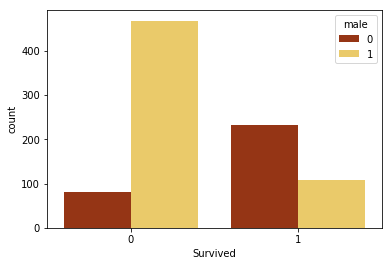

In [42]:
sns.countplot(x='Survived',hue='male',data=df_train,palette='afmhot')

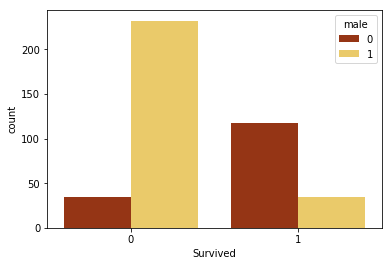

In [43]:
sns.countplot(x='Survived',hue='male',data=df_test,palette='afmhot')

The above Counplots show that the prediction of Survival across Sex is in sync with the train data.

2) Validating Survival across Passenger Class

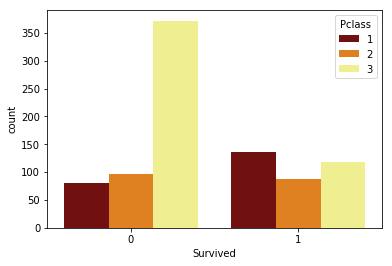

In [44]:
sns.countplot(x='Survived',hue='Pclass',data=df_train,palette='afmhot')

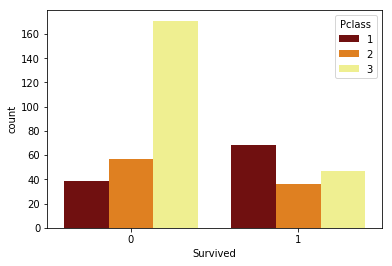

In [45]:
sns.countplot(x='Survived',hue='Pclass',data=df_test,palette='afmhot')

The above Counplots show that the prediction of Survival across Passenger Class is in sync with the train data.

## Exporting the results to external CSV file

In [46]:
df_test[['PassengerID', 'Survived']].to_csv('Titanic_LogRegression.csv', index=False)

## Checking accuracy of the algorithm used

In [47]:
acc_ranclf = round(ranclf.score(x_train, y_train) * 100, 2)
acc_ranclf

98.05

In [52]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(ranclf, x_train, y_train)
scores.mean()

0.7844032373180355